In [109]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Pandas DataFrame Approach

## Read in Data

In [103]:
# replace this path with any other path to json file of same format
path = 'records.json'

In [104]:
df = pd.read_json(path)

## Reindex so that rows are in same order as columns

In [105]:
# The second reindex is there so that Tm doesn't double stack on df
df = df.reindex(index=df.columns).reindex()
df.columns.name = 'Tm'

## Get only the wins associated

In [106]:
def get_wins(row):
    # getting L because want wins to read across rows, not down columns
    return row.apply(lambda x: int(x['L']) if not isinstance(x, float) else '--')
df = df.apply(get_wins)

# alternative approach is to return x['W'] and then transpose df after applying the function. 

In [107]:
df

Tm,BRO,BSN,CHC,CIN,NYG,PHI,PIT,STL
BRO,--,10,15,15,14,14,15,11
BSN,12,--,13,13,13,14,12,9
CHC,7,9,--,12,7,16,8,10
CIN,7,9,10,--,13,13,13,8
NYG,8,9,15,9,--,12,15,13
PHI,8,8,6,9,10,--,13,8
PIT,7,10,14,9,7,9,--,6
STL,11,13,12,14,9,14,16,--


# Iterative approach

## Load in Data

In [97]:
with open(path) as f:
    data = json.load(f)

## Construct a table-like data structure

In [98]:
table = []
ordering = list(data.keys())
for team, opps in data.items():
    # Our first column needs to be the teams
    row = [0] * (len(ordering) + 1)
    row[0] = team
    # Find the number of wins for the team against an opp
    for i, t in enumerate(ordering):
        # case for itself (e.g. BRO vs BRO)
        if t not in opps.keys():
            row[i+1] = '--'
        else:
            row[i+1] = opps[t]['W']
        
    table.append(row)

## Visualize the table

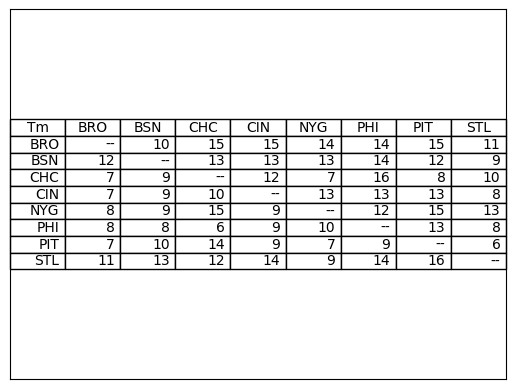

In [99]:
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

ax.table(cellText=table,colLabels=['Tm'] + ordering,loc='center')
plt.show()